## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime
from dateutil import parser

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.axisbelow'] = True

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
init_notebook_mode(True)

from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d,scatter3d,histo

## Day 1: Gradient Plots

In [41]:
plotdir = hpc_ext_path+'plots/magnet_maps/2019-06-06/'

In [5]:
directory = hpc_ext_path+'datafiles/magnet_maps/'
filename = '2019-06-06 133226.txt'

In [6]:
df = pd.read_csv(directory+filename)

In [7]:
df.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_MicroStep_X,Zaber_Meas_Encoder_X,Zaber_Meas_MicroStep_Y,Zaber_Meas_Encoder_Y,Zaber_Meas_MicroStep_Z,Zaber_Meas_Encoder_Z
count,17576.000000,17576.000000,17576.000000,17576.0,17576.000000,17576.000000,1.757600e+04,17576.000000,17576.000000,17576.000000,17576.000000,1.757600e+04,17576.000000
mean,8.472852,38.442974,1.097418,0.0,550000.000000,450000.000000,1.620000e+06,550000.000000,214843.750000,450000.000000,175781.250000,1.620000e+06,632812.500000
std,0.000008,0.045520,0.492796,0.0,30000.853473,30000.853473,3.000085e+04,30000.853473,11719.083388,30000.853473,11719.083388,3.000085e+04,11719.083388
min,8.472832,38.264517,0.000000,0.0,500000.000000,400000.000000,1.570000e+06,500000.000000,195312.500000,400000.000000,156250.000000,1.570000e+06,613281.250000
25%,8.472846,38.412883,1.318363,0.0,524000.000000,424000.000000,1.594000e+06,524000.000000,204687.500000,424000.000000,165625.000000,1.594000e+06,622656.250000
50%,8.472853,38.456583,1.318658,0.0,550000.000000,450000.000000,1.620000e+06,550000.000000,214843.750000,450000.000000,175781.250000,1.620000e+06,632812.500000
75%,8.472857,38.479617,1.318915,0.0,576000.000000,476000.000000,1.646000e+06,576000.000000,225000.000000,476000.000000,185937.500000,1.646000e+06,642968.750000
max,8.472875,38.520350,1.319720,0.0,600000.000000,500000.000000,1.670000e+06,600000.000000,234375.000000,500000.000000,195312.500000,1.670000e+06,652343.750000


In [8]:
drops = [col for col in list(df.columns) if ("MicroStep" in col) or ("FFT" in col)]

df.drop(drops,axis=1,inplace=True)

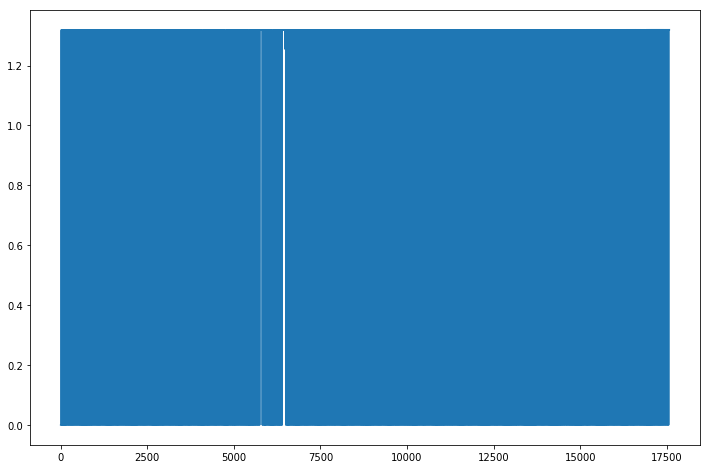

In [9]:
df['NMR [T]'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d2f3243c8>,
      dtype=object)

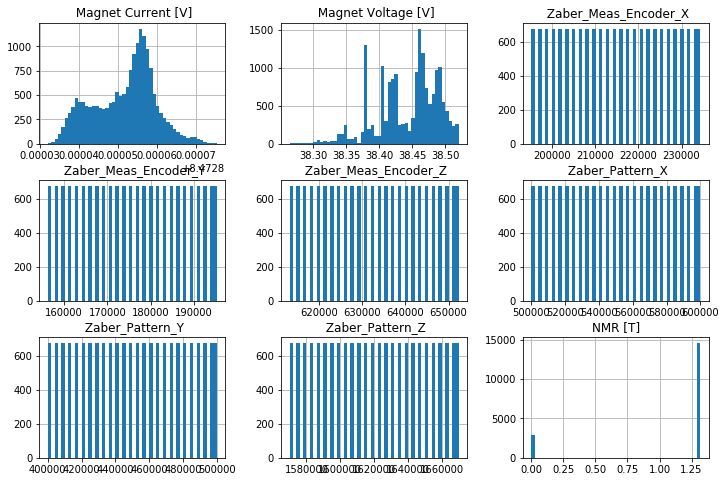

In [10]:
df.hist(bins=50)

In [11]:
notzero = df['NMR [T]'] != 0

df_nz = df[notzero]

In [12]:
len(df_nz)

14627

In [13]:
len(df)

17576

In [14]:
14627/17576

0.8322143832498862

In [15]:
df_nz.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z
count,14627.000000,14627.000000,14627.000000,14627.000000,14627.000000,1.462700e+04,14627.000000,14627.000000,14627.000000
mean,8.472852,38.442876,1.318672,549601.148561,451306.488002,1.628332e+06,214687.948657,176291.596876,636067.236532
std,0.000008,0.045172,0.005536,29860.284877,29010.243307,2.553974e+04,11664.173780,11332.126292,9976.460852
min,8.472832,38.265517,0.791026,500000.000000,400000.000000,1.570000e+06,195312.500000,156250.000000,613281.250000
25%,8.472846,38.413083,1.318542,524000.000000,428000.000000,1.606000e+06,204687.500000,167187.500000,627343.750000
50%,8.472854,38.456117,1.318719,548000.000000,452000.000000,1.630000e+06,214062.500000,176562.500000,636718.750000
75%,8.472857,38.479342,1.319006,576000.000000,476000.000000,1.650000e+06,225000.000000,185937.500000,644531.250000
max,8.472875,38.520350,1.319720,600000.000000,500000.000000,1.670000e+06,234375.000000,195312.500000,652343.750000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d2eb67240>,
      dtype=object)

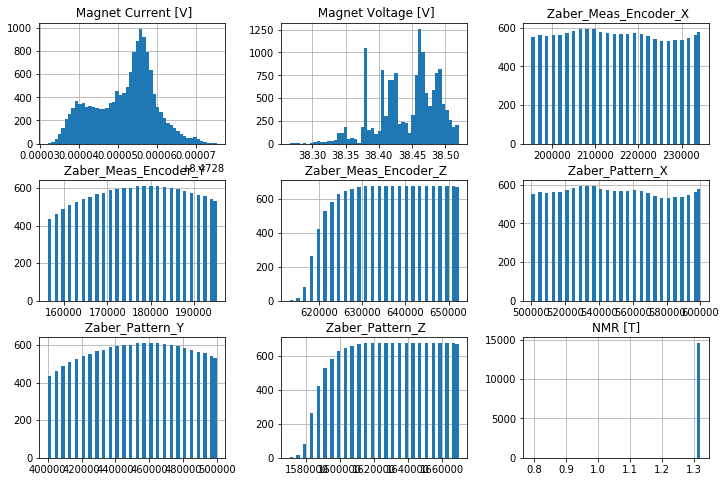

In [16]:
df_nz.hist(bins=50)

In [17]:
df_nz['NMR [T]'].quantile(0.02)

1.3181248377199999

In [26]:
df_nz['NMR [T]'].quantile(0.01)

1.31801893026

In [18]:
df['NMR [T]'].quantile(0.24)

1.318341203

In [28]:
histo(df_nz['NMR [T]'],bins=50,yscale='log',inline=True);

In [34]:
c2 = df_nz['NMR [T]'] >= df_nz['NMR [T]'].quantile(0.01)

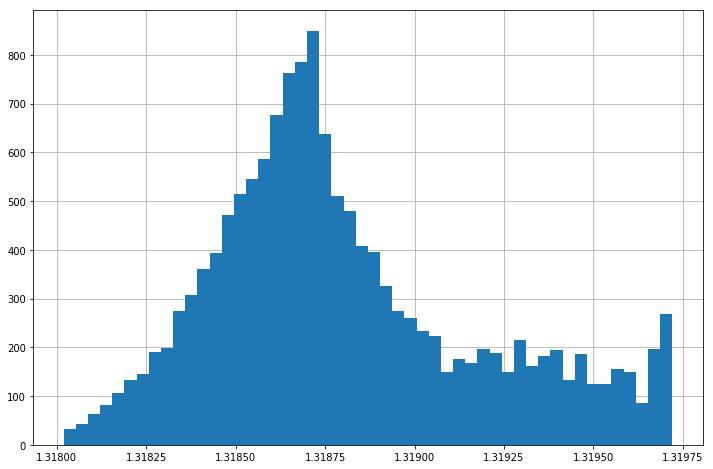

In [35]:
df_nz[c2]['NMR [T]'].hist(bins=50)

Let's take a look at where that tail is.

In [195]:
t_cut = df_nz['NMR [T]'] > 1.31905

In [196]:
fig = scatter3d([df_nz[t_cut][' Zaber_Pattern_X'],df_nz[' Zaber_Pattern_X']],[df_nz[t_cut][' Zaber_Pattern_Y'],df_nz[' Zaber_Pattern_Y']],[df_nz[t_cut][' Zaber_Pattern_Z'],df_nz[' Zaber_Pattern_Z']],scale_list=[df_nz[t_cut]['GRAD_B_MAG'],df_nz["GRAD_B_MAG"]],opacity_list=[1.,0.25],colors_list=['Hot','Viridis'],inline=False);

Tail is for large x (maybe near pole?)

In [31]:
df_nz[c2]['NMR [T]'].describe()

count    14480.000000
mean         1.318806
std          0.000379
min          1.318019
25%          1.318549
50%          1.318722
75%          1.319012
max          1.319720
Name: NMR [T], dtype: float64

In [36]:
scatter3d(df_nz[' Zaber_Pattern_X'],df_nz[' Zaber_Pattern_Y'],df_nz[' Zaber_Pattern_Z'],scale_list=[df_nz['NMR [T]']]);

In [192]:
fig = scatter3d(df[' Zaber_Pattern_X'],df[' Zaber_Pattern_Y'],df[' Zaber_Pattern_Z'],scale_list=[df['NMR [T]']]);

In [42]:
pio.write_image(fig, plotdir+'nmr_full_finergrid2_2019-06-06.pdf')

Note: NMR is actually fine! Probe arm was remounted.

In [44]:
slicex = df[' Zaber_Pattern_X'] == 548000.

In [66]:
s = df[slicex].sort_values(by=[" Zaber_Pattern_Z"," Zaber_Pattern_Y"],axis=0)

In [72]:
X = s[' Zaber_Pattern_Y'].unique()
Y = s[' Zaber_Pattern_Z'].unique()

Z = s['NMR [T]'].values

In [73]:
XX,YY = np.meshgrid(X,Y)
ZZ = np.reshape(Z,(len(X),len(Y)))

In [163]:
fig = scatter3d(s[' Zaber_Pattern_X'],s[' Zaber_Pattern_Y'],s[' Zaber_Pattern_Z'],scale_list=[s['NMR [T]']],inline=False);

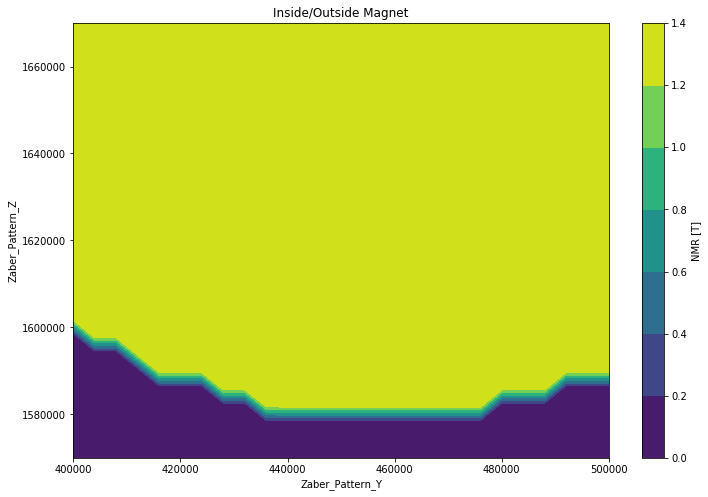

In [80]:
CS = plt.contourf(XX,YY,ZZ)#,colors='k')
plt.title("Inside/Outside Magnet")
plt.xlabel('Zaber_Pattern_Y')
plt.ylabel('Zaber_Pattern_Z')
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel("NMR [T]")
plt.savefig(plotdir+'inside_outside_magnet.pdf')
plt.savefig(plotdir+'inside_outside_magnet.png')

In [172]:
slicex = (df[' Zaber_Pattern_X'] == 548000.) & (df[' Zaber_Pattern_Z'] < 1605000.) & (df[' Zaber_Pattern_Z'] > 1575000.)

In [173]:
s = df[slicex].sort_values(by=[" Zaber_Pattern_Z"," Zaber_Pattern_Y"],axis=0)

X = s[' Zaber_Pattern_Y'].unique()
Y = s[' Zaber_Pattern_Z'].unique()

Z = s['NMR [T]'].values

XX,YY = np.meshgrid(X,Y)#,indexing='ij')
#ZZ = np.reshape(Z,(len(X),len(Y)))
ZZ = np.reshape(Z,(len(Y),len(X)))

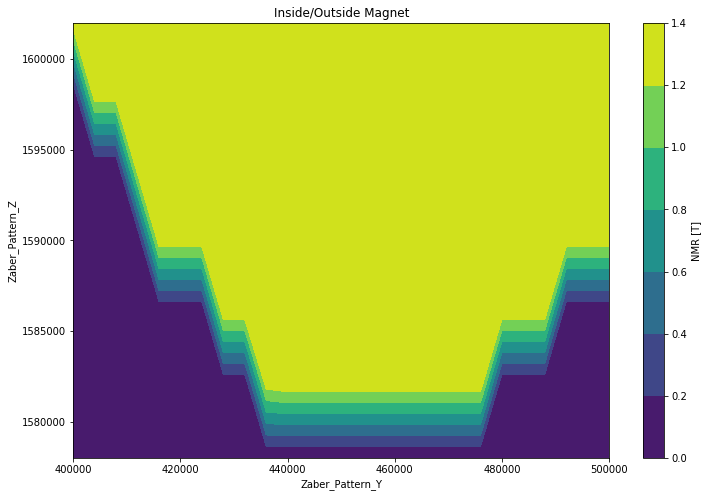

In [174]:
CS = plt.contourf(XX,YY,ZZ)#,colors='k')
plt.title("Inside/Outside Magnet")
plt.xlabel('Zaber_Pattern_Y')
plt.ylabel('Zaber_Pattern_Z')
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel("NMR [T]")
plt.savefig(plotdir+'inside_outside_magnet_zoomed1.pdf')
plt.savefig(plotdir+'inside_outside_magnet_zoomed1.png')

In [188]:
slicex = (df[' Zaber_Pattern_X'] == 548000.) & (df[' Zaber_Pattern_Z'] < 1586000.) & (df[' Zaber_Pattern_Z'] > 1577000.)

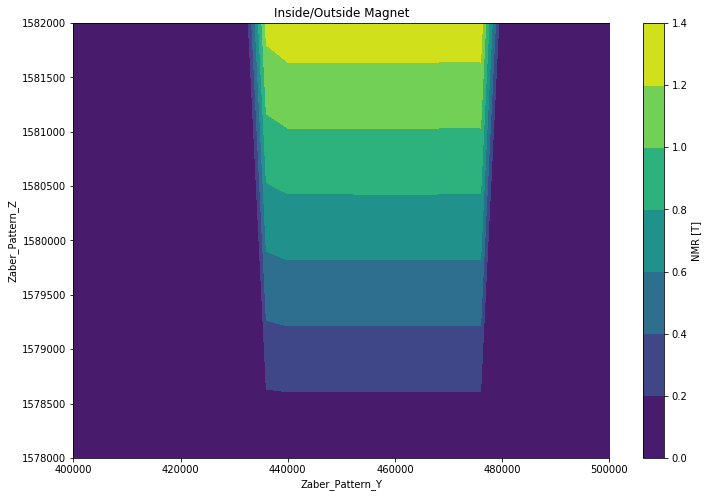

In [189]:
s = df[slicex].sort_values(by=[" Zaber_Pattern_Z"," Zaber_Pattern_Y"],axis=0)

X = s[' Zaber_Pattern_Y'].unique()
Y = s[' Zaber_Pattern_Z'].unique()

Z = s['NMR [T]'].values

XX,YY = np.meshgrid(X,Y)#,indexing='ij')
#ZZ = np.reshape(Z,(len(X),len(Y)))
ZZ = np.reshape(Z,(len(Y),len(X)))

CS = plt.contourf(XX,YY,ZZ)#,colors='k')
plt.title("Inside/Outside Magnet")
plt.xlabel('Zaber_Pattern_Y')
plt.ylabel('Zaber_Pattern_Z')
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel("NMR [T]")
plt.savefig(plotdir+'inside_outside_magnet_zoomed2.pdf')
plt.savefig(plotdir+'inside_outside_magnet_zoomed2.png')

In [81]:
df_c = df

### Gradient

In [82]:
x = df_c[' Zaber_Pattern_X'].unique()
y = df_c[' Zaber_Pattern_Y'].unique()
z = df_c[' Zaber_Pattern_Z'].unique()

In [83]:
ff = np.array(df_c['NMR [T]'])
ff = np.reshape(ff,(len(x),len(y),len(z)))

In [84]:
gradx, grady, gradz = np.gradient(ff,x,y,z)

In [85]:
gradmag = (gradx**2+grady**2+gradz**2)**(1/2)

In [86]:
gradx = pd.Series(gradx.flatten())
grady = pd.Series(grady.flatten())
gradz = pd.Series(gradz.flatten())

In [87]:
gradmag = pd.Series(gradmag.flatten())

In [88]:
df_c['GRAD_B_X'],df_c['GRAD_B_Y'],df_c['GRAD_B_Z'],df_c['GRAD_B_MAG'] = (gradx,grady,gradz,gradmag)

In [89]:
notzero = df_c['NMR [T]'] != 0

In [90]:
df_g = df_c[notzero]

In [91]:
#g_cut = df_g["GRAD_B_MAG"] <= df_g["GRAD_B_MAG"].quantile(0.2)
g_cut = df_g["GRAD_B_MAG"] <= df_g["GRAD_B_MAG"].quantile(0.1)

In [92]:
fig = scatter3d([df_g[g_cut][' Zaber_Pattern_X'],df_g[' Zaber_Pattern_X']],[df_g[g_cut][' Zaber_Pattern_Y'],df_g[' Zaber_Pattern_Y']],[df_g[g_cut][' Zaber_Pattern_Z'],df_g[' Zaber_Pattern_Z']],scale_list=[df_g[g_cut]['GRAD_B_MAG'],df_g["GRAD_B_MAG"]],opacity_list=[1.,0.25],colors_list=['Hot','Viridis'],inline=False);

In [93]:
#fig.layout.xaxis.title='Zaber_Pattern_Z (microns)'
fig.layout.scene.xaxis = dict(title=r"Zaber_Pattern_X")
fig.layout.scene.yaxis = dict(title=r"Zaber_Pattern_Y")
fig.layout.scene.zaxis = dict(title=r"Zaber_Pattern_Z")
fig.layout.title = "|grad(B)| vs. x,y,z: Gradient Cut"

In [94]:
plot(fig,filename=plotdir+'gradient_cut_2019-05-24.html')
pio.write_image(fig,plotdir+'gradient_cut_2019-05-24.pdf')

In [95]:
fig = scatter3d([df_g[g_cut][' Zaber_Pattern_X']],[df_g[g_cut][' Zaber_Pattern_Y']],[df_g[g_cut][' Zaber_Pattern_Z']],scale_list=[df_g[g_cut]['GRAD_B_MAG']],opacity_list=[1.],colors_list=['Viridis'],inline=False);

In [98]:
x_cut = (df_g[' Zaber_Pattern_X'] > 527900) & (df_g[' Zaber_Pattern_X'] < 548100)
#x_cut = (df_g[' Zaber_Meas_Encoder_X'] > 200000) & (df_g[' Zaber_Meas_Encoder_X'] < 230000)
y_cut = (df_g[' Zaber_Pattern_Y'] > 447900) & (df_g[' Zaber_Pattern_Y'] < 472100)
z_cut = (df_g[' Zaber_Pattern_Z'] > 1625900) & (df_g[' Zaber_Pattern_Z'] < 1654100)
#g_cut2 = g_cut & x_cut
g_cut2 = g_cut & x_cut & y_cut & z_cut

In [99]:
fig = scatter3d([df_g[g_cut2][' Zaber_Pattern_X']],[df_g[g_cut2][' Zaber_Pattern_Y']],[df_g[g_cut2][' Zaber_Pattern_Z']],scale_list=[df_g[g_cut2]['GRAD_B_MAG']],opacity_list=[1.],colors_list=['Viridis'],inline=False);

In [100]:
#fig.layout.xaxis.title='Zaber_Pattern_Z (microns)'
fig.layout.scene.xaxis = dict(title=r"Zaber_Pattern_X")
fig.layout.scene.yaxis = dict(title=r"Zaber_Pattern_Y")
fig.layout.scene.zaxis = dict(title=r"Zaber_Pattern_Z")
fig.layout.title = "|grad(B)| vs. x,y,z: Gradient Cut + Position Cut"

In [101]:
plot(fig,filename=plotdir+'gradient_position_cuts_2019-06-06.html')
pio.write_image(fig,plotdir+'gradient_position_cuts_2019-06-06.pdf')

In [102]:
df_g.describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,14627.000000,14627.000000,14627.000000,14627.000000,14627.000000,1.462700e+04,14627.000000,14627.000000,14627.000000,1.462700e+04,1.462700e+04,1.462700e+04,1.462700e+04
mean,8.472852,38.442876,1.318672,549601.148561,451306.488002,1.628332e+06,214687.948657,176291.596876,636067.236532,3.972647e-07,1.054867e-06,7.524250e-06,9.966133e-06
std,0.000008,0.045172,0.005536,29860.284877,29010.243307,2.553974e+04,11664.173780,11332.126292,9976.460852,2.042621e-05,2.205446e-05,3.474214e-05,4.548851e-05
min,8.472832,38.265517,0.791026,500000.000000,400000.000000,1.570000e+06,195312.500000,156250.000000,613281.250000,-1.648565e-04,-1.649510e-04,-1.649135e-04,4.233328e-10
25%,8.472846,38.413083,1.318542,524000.000000,428000.000000,1.606000e+06,204687.500000,167187.500000,627343.750000,-7.139062e-09,-3.612812e-09,-1.559938e-09,1.371754e-08
50%,8.472854,38.456117,1.318719,548000.000000,452000.000000,1.630000e+06,214062.500000,176562.500000,636718.750000,6.389875e-09,1.150500e-09,1.472125e-09,2.077168e-08
75%,8.472857,38.479342,1.319006,576000.000000,476000.000000,1.650000e+06,225000.000000,185937.500000,644531.250000,2.307862e-08,7.330812e-09,7.087438e-09,2.722742e-08
max,8.472875,38.520350,1.319720,600000.000000,500000.000000,1.670000e+06,234375.000000,195312.500000,652343.750000,3.299127e-04,1.649578e-04,1.649573e-04,4.040593e-04


In [103]:
df_g[g_cut].describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1.463000e+03,1463.000000,1463.000000,1463.000000,1.463000e+03,1.463000e+03,1.463000e+03,1.463000e+03
mean,8.472851,38.439565,1.318683,536806.561859,456672.590567,1.639528e+06,209690.063226,178387.730690,640440.768113,-3.279556e-10,2.625079e-10,1.648983e-10,6.169494e-09
std,0.000007,0.029509,0.000063,10359.088247,15891.091614,1.639306e+04,4046.518846,6207.457662,6403.537273,3.646181e-09,3.931031e-09,3.598827e-09,1.953024e-09
min,8.472835,38.347217,1.318397,500000.000000,400000.000000,1.586000e+06,195312.500000,156250.000000,619531.250000,-8.814125e-09,-8.884250e-09,-8.031625e-09,4.233328e-10
25%,8.472844,38.418083,1.318651,528000.000000,448000.000000,1.630000e+06,206250.000000,175000.000000,636718.750000,-3.153688e-09,-2.750500e-09,-2.241813e-09,4.746953e-09
50%,8.472853,38.424900,1.318691,536000.000000,456000.000000,1.642000e+06,209375.000000,178125.000000,641406.250000,2.688750e-10,5.837500e-10,-2.126250e-10,6.504216e-09
75%,8.472856,38.462058,1.318723,544000.000000,468000.000000,1.650000e+06,212500.000000,182812.500000,644531.250000,2.238375e-09,3.357187e-09,2.727750e-09,7.780452e-09
max,8.472867,38.492783,1.318988,560000.000000,500000.000000,1.670000e+06,218750.000000,195312.500000,652343.750000,7.382625e-09,8.806250e-09,8.772250e-09,8.913012e-09


In [104]:
df_g[g_cut2].describe()

,Magnet Current [V],Magnet Voltage [V],NMR [T],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Encoder_X,Zaber_Meas_Encoder_Y,Zaber_Meas_Encoder_Z,GRAD_B_X,GRAD_B_Y,GRAD_B_Z,GRAD_B_MAG
count,327.000000,327.000000,327.000000,327.000000,327.000000,3.270000e+02,327.000000,327.000000,327.000000,3.270000e+02,3.270000e+02,3.270000e+02,3.270000e+02
mean,8.472852,38.440342,1.318719,538116.207951,459694.189602,1.640312e+06,210201.643731,179568.042813,640746.846330,3.257232e-10,-2.087534e-10,6.974427e-11,3.558467e-09
std,0.000006,0.024325,0.000013,6876.559298,7898.399885,9.095975e+03,2686.155976,3085.312455,3553.115191,2.297443e-09,2.403922e-09,1.728387e-09,1.223881e-09
min,8.472838,38.412417,1.318681,528000.000000,448000.000000,1.626000e+06,206250.000000,175000.000000,635156.250000,-4.628125e-09,-4.796875e-09,-3.666250e-09,4.233328e-10
25%,8.472848,38.423867,1.318710,532000.000000,452000.000000,1.634000e+06,207812.500000,176562.500000,638281.250000,-1.021187e-09,-2.315375e-09,-1.146250e-09,2.663839e-09
50%,8.472855,38.435133,1.318719,540000.000000,460000.000000,1.642000e+06,210937.500000,179687.500000,641406.250000,1.255875e-09,-2.393750e-10,-1.640000e-10,3.505671e-09
75%,8.472857,38.457500,1.318727,544000.000000,468000.000000,1.650000e+06,212500.000000,182812.500000,644531.250000,2.250750e-09,2.033750e-09,1.224438e-09,4.421698e-09
max,8.472860,38.488067,1.318746,548000.000000,472000.000000,1.654000e+06,214062.500000,184375.000000,646093.750000,4.062875e-09,3.884875e-09,3.930750e-09,6.993922e-09


In [105]:
best_center = df_g[g_cut2][' Zaber_Meas_Encoder_X'].min()+(df_g[g_cut2][' Zaber_Meas_Encoder_X'].max()-df_g[g_cut2][' Zaber_Meas_Encoder_X'].min())/2
best_center

210156.25

In [107]:
true_center = 208984.375
best_center-true_center

1171.875

In [108]:
df_g[g_cut2].drop('Time',axis=1).max()-df_g[g_cut2].drop('Time',axis=1).min()

 Magnet Current [V]      2.191900e-05
 Magnet Voltage [V]      7.565000e-02
NMR [T]                  6.514800e-05
 Zaber_Pattern_X         2.000000e+04
 Zaber_Pattern_Y         2.400000e+04
 Zaber_Pattern_Z         2.800000e+04
 Zaber_Meas_Encoder_X    7.812500e+03
 Zaber_Meas_Encoder_Y    9.375000e+03
 Zaber_Meas_Encoder_Z    1.093750e+04
GRAD_B_X                 8.691000e-09
GRAD_B_Y                 8.681750e-09
GRAD_B_Z                 7.597000e-09
GRAD_B_MAG               6.570589e-09
dtype: float64

In [109]:
df_g.drop('Time',axis=1).max()-df_g.drop('Time',axis=1).min()

 Magnet Current [V]           0.000043
 Magnet Voltage [V]           0.254833
NMR [T]                       0.528694
 Zaber_Pattern_X         100000.000000
 Zaber_Pattern_Y         100000.000000
 Zaber_Pattern_Z         100000.000000
 Zaber_Meas_Encoder_X     39062.500000
 Zaber_Meas_Encoder_Y     39062.500000
 Zaber_Meas_Encoder_Z     39062.500000
GRAD_B_X                      0.000495
GRAD_B_Y                      0.000330
GRAD_B_Z                      0.000330
GRAD_B_MAG                    0.000404
dtype: float64

In [111]:
df.drop('Time',axis=1).max()-df.drop('Time',axis=1).min()

 Magnet Current [V]           0.000043
 Magnet Voltage [V]           0.255833
NMR [T]                       1.319720
 Zaber_Pattern_X         100000.000000
 Zaber_Pattern_Y         100000.000000
 Zaber_Pattern_Z         100000.000000
 Zaber_Meas_Encoder_X     39062.500000
 Zaber_Meas_Encoder_Y     39062.500000
 Zaber_Meas_Encoder_Z     39062.500000
GRAD_B_X                      0.000495
GRAD_B_Y                      0.000660
GRAD_B_Z                      0.000659
GRAD_B_MAG                    0.000495
dtype: float64

In [112]:
#df_g[" Zaber_Pattern_Z"].unique()
#x = df_g[" Zaber_Meas_Encoder_X"].unique()
#x = df_g[" Zaber_Meas_Encoder_Y"].unique()
x = df_g[" Zaber_Meas_Encoder_Z"].unique()
for i,p in enumerate(x[:-1]):
    print (x[i+1] - x[i])

1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
1562.5
-25000.0
-1562.5
-1562.5
-1562.5
-1562.5
-1562.5
-1562.5
-1562.5
-1562.5
-1562.5


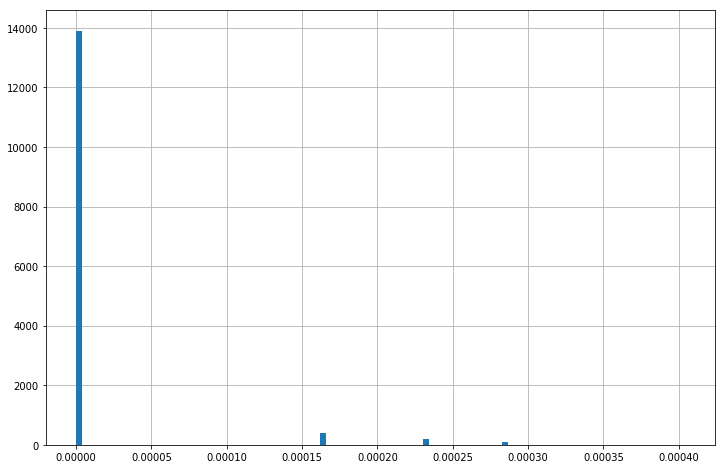

In [113]:
df_g.GRAD_B_MAG.hist(bins=100)

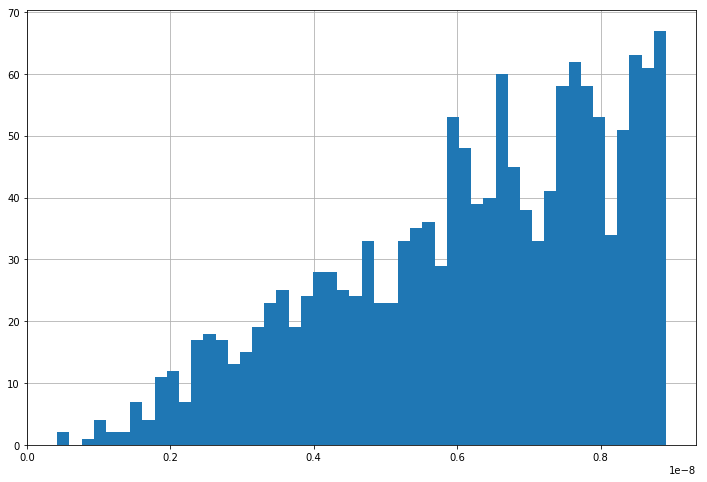

In [114]:
df_g[g_cut].GRAD_B_MAG.hist(bins=50)

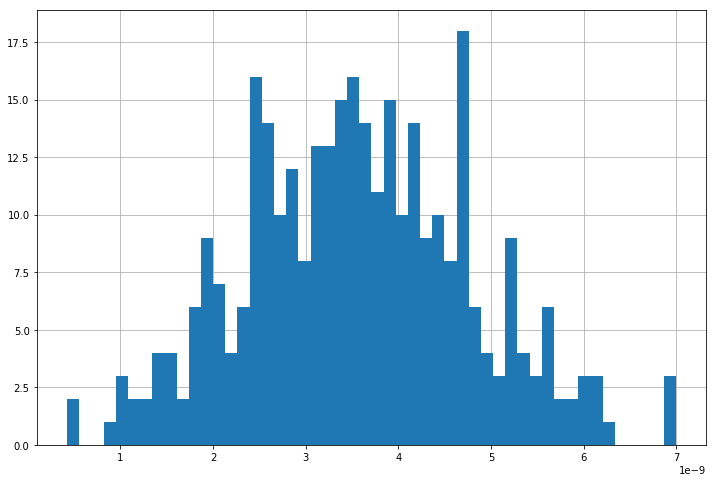

In [115]:
df_g[g_cut2].GRAD_B_MAG.hist(bins=50)

In [116]:
df_c.GRAD_B_MAG.describe()

count    1.757600e+04
mean     1.674130e-05
std      5.942049e-05
min      0.000000e+00
25%      1.054214e-08
50%      1.945319e-08
75%      2.711804e-08
max      4.947447e-04
Name: GRAD_B_MAG, dtype: float64

In [117]:
df_c.GRAD_B_Y.describe()

count    1.757600e+04
mean     1.905080e-06
std      3.114969e-05
min     -3.298107e-04
25%     -2.621000e-09
50%      0.000000e+00
75%      6.124219e-09
max      3.299129e-04
Name: GRAD_B_Y, dtype: float64

In [118]:
d0 = parser.parse(df['Time'].head(1)[0])

d = parser.parse(df['Time'].tail(1)[17575])

tdelta = d-d0

speed = tdelta.total_seconds() / len(df)
speed

20.276627218934912

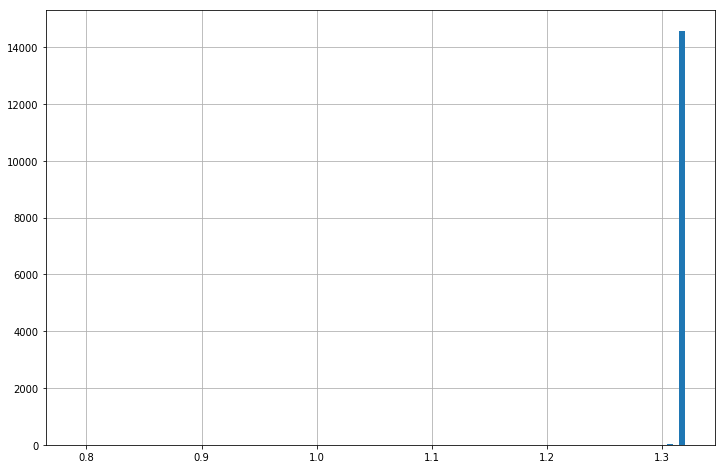

In [119]:
df_g['NMR [T]'].hist(bins=100)

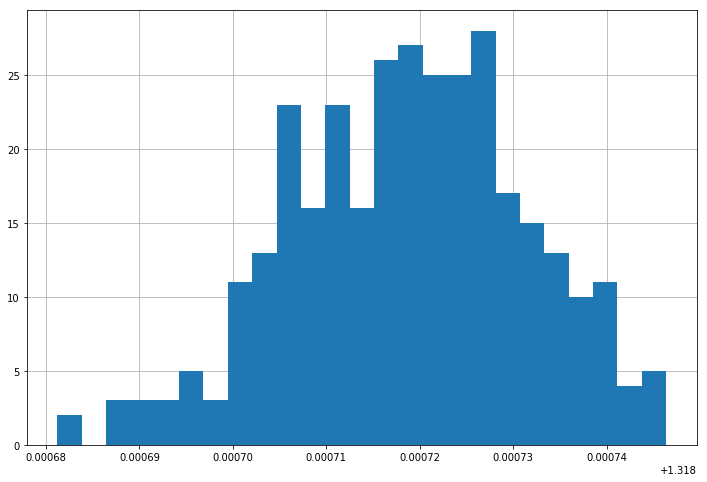

In [120]:
df_g[g_cut2]['NMR [T]'].hist(bins=25)

In [121]:
df_g['NMR [T]'].describe()

count    14627.000000
mean         1.318672
std          0.005536
min          0.791026
25%          1.318542
50%          1.318719
75%          1.319006
max          1.319720
Name: NMR [T], dtype: float64

In [122]:
df_g[g_cut2]['NMR [T]'].describe()

count    327.000000
mean       1.318719
std        0.000013
min        1.318681
25%        1.318710
50%        1.318719
75%        1.318727
max        1.318746
Name: NMR [T], dtype: float64

In [123]:
fig = histo(df_g['NMR [T]'],bins=100, inline=True)
fig = histo(df_g['NMR [T]'],bins=100,yscale='log', inline=True)

In [124]:
fig.layout.title = "NMR [T]: No Cut"

In [125]:
iplot(fig)

In [130]:
fig = histo(df_g[g_cut2]['NMR [T]'],bins=25,yscale='log',inline=True)
fig = histo(df_g[g_cut2]['NMR [T]'],bins=25,inline=True)

In [131]:
fig.layout.title = "NMR [T]: Gradient + Position Cut"

In [132]:
iplot(fig)

In [133]:
pio.write_image(fig,plotdir+'nmr_hist_gradient_position_cuts_2019-06-06.png')
pio.write_image(fig,plotdir+'nmr_hist_gradient_position_cuts_2019-05-06.pdf')

### Dump gradient data

In [199]:
pkl.dump(df_c,open(directory+filename.rstrip('.txt')+'.pkl','wb'))

## Day 2: "Slices and Uniformity" -Thomas

In [134]:
# 3d surface plots
df_c[' Zaber_Pattern_X'].unique()

array([500000., 504000., 508000., 512000., 516000., 520000., 524000.,
       528000., 532000., 536000., 540000., 544000., 548000., 552000.,
       556000., 560000., 564000., 568000., 572000., 576000., 580000.,
       584000., 588000., 592000., 596000., 600000.])

In [135]:
slicesx = []
for x in df_c[' Zaber_Pattern_X'].unique():
    #_ = df_c[df_c[' Zaber_Pattern_X'] == x]
    slicesx.append(df_c[df_c[' Zaber_Pattern_X'] == x])
    #slicesx.append(_)

In [136]:
for slicex in slicesx:
    x_slice = slicex[' Zaber_Pattern_X'].head(1).values[0]
    x = slicex[' Zaber_Pattern_Y'].unique()
    y = slicex[' Zaber_Pattern_Z'].unique()
    z = np.array(slicex['NMR [T]'])
    z = np.array([i if i>=slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) else slicex['NMR [T]'][slicex['NMR [T]']!=0].quantile(0.05) for i in z])
    xx,yy = np.meshgrid(x,y,indexing='ij')
    zz = np.reshape(z,(len(x),len(y)))
    
    data = [go.Surface(x=xx,y=yy,z=zz, opacity=0.8, colorscale="Viridis")]#,cmin=1.346,cmax=1.348)]

    layout = go.Layout(
        title=f'Zaber_Pattern_X = {x_slice} slice',
        scene = dict(
        xaxis= dict(
            title='Zaber_Pattern_Y'
        ),
        yaxis=dict(
            title='Zaber_Pattern_Z'
        ),
        zaxis=dict(
            title='NMR (T)'
        )
        )
    )

    fig = go.Figure(data=data, layout=layout)
    fname = plotdir+f"slices/xslice_pattern_{x_slice}"#+'.pdf'
    plot(fig,filename=fname+'.html')
    pio.write_image(fig, fname+'.pdf')